In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
my_dataset = pd.read_csv('books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
my_dataset.shape

(11123, 12)

In [4]:
my_dataset.columns[0:12]

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [5]:
my_dataset.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [6]:
my_dataset.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

**Descrição das informações contidas nas colunas.**

    {bookID} Contém o identificador único de cada livro/série
    {title} Contém os títulos dos livros
    {authors} Contém o nome do autor do livro
    {average_rating} É a classificação média dos livros, decidido pelos usuários
    {isbn} ISBN(10) Sistema Internacional de identificação de livros e softwares que utiliza números para classificá-los por título, autor, país, editora e edição
    {isbn13} Novo formato do ISBN, implementado em 2007, possuindo 13 digítos
    {language_code} Contém o idioma do livro
    {num_pages} Contém o número de páginas do livro
    {ratings_count} Contém o número de avaliações recebidas pelo livro
    {text_reviews_count} Contém o número de comentários feitos pelos usuários

In [7]:
my_dataset.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [8]:
top_books = my_dataset[my_dataset['ratings_count'] > 1000000]
top_books = top_books.sort_values(by='average_rating', ascending=False).head(20)
# top 20 dos livros mais bem avaliados

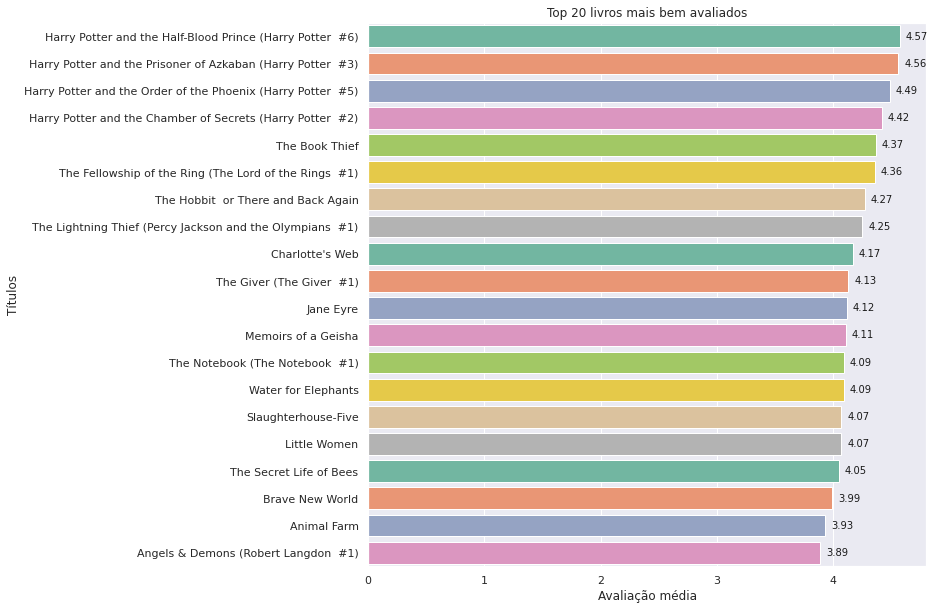

In [9]:
#plotagem do resultado analisado na célula anterior

sns.set(style = "darkgrid")
plt.figure(figsize = (10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x = "average_rating", y = "title", data = top_books, palette=color)
plt.title("Top 20 livros mais bem avaliados")
plt.xlabel("Avaliação média")
plt.ylabel("Títulos")

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

In [10]:
#20 livros com mais avaliações
top_vote = my_dataset.sort_values(by = 'ratings_count', ascending = False).head(20)

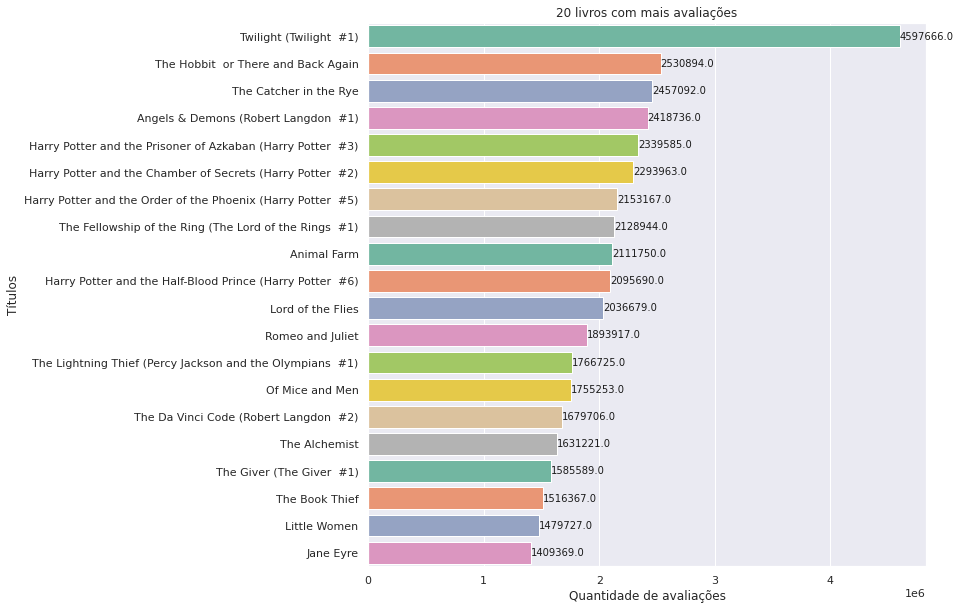

In [11]:
#plotagem do resultado analisado na célula anterior

sns.set(style = "darkgrid")
plt.figure(figsize = (10, 10))

color = sns.color_palette("Set2")
ax = sns.barplot(x = "ratings_count", y = "title", data = top_vote, palette = color)

plt.title("20 livros com mais avaliações")
plt.xlabel("Quantidade de avaliações")
plt.ylabel("Títulos")

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

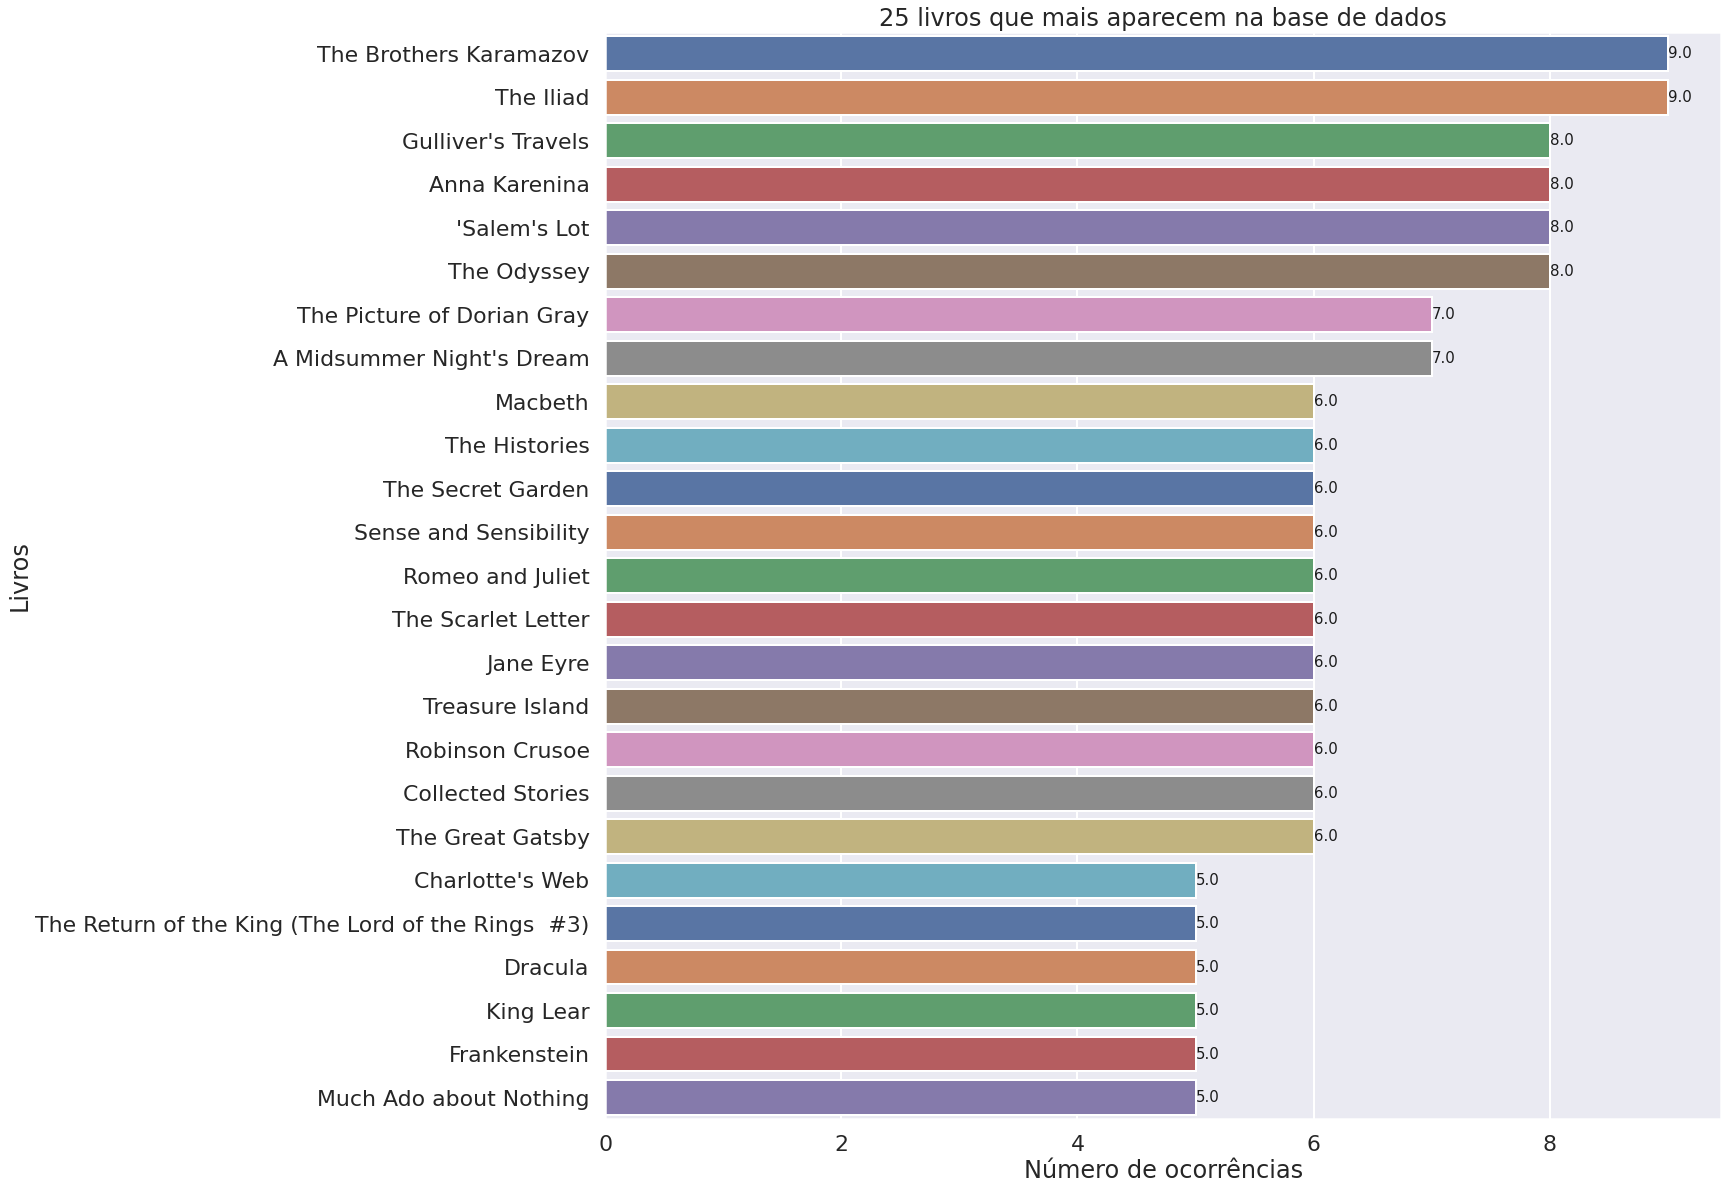

In [12]:
#livros que mais aparecem na base de dados
sns.set_context('poster')
plt.figure(figsize = (20,20))
books = my_dataset['title'].value_counts()[:25]
rating = my_dataset.average_rating[:25]

#plotagem do resultado analisado
ax = sns.barplot(x = books, y = books.index, palette = 'deep')
plt.title("25 livros que mais aparecem na base de dados")
plt.xlabel("Número de ocorrências")
plt.ylabel("Livros")

for i in ax.patches:
    ax.text(i.get_width() , i.get_y()  + 0.5, str(i.get_width()), fontsize = 15, color = 'k')
plt.show()

In [13]:
list(set(top_books['title'].values) - set(top_vote['title'].values))
#Bem avaliados, mas não entre os livros com mais avaliações

['Slaughterhouse-Five',
 'Water for Elephants',
 'The Notebook (The Notebook  #1)',
 'Memoirs of a Geisha',
 'The Secret Life of Bees',
 "Charlotte's Web",
 'Brave New World']

In [14]:
list(set(top_vote['title'].values) - set(top_books['title'].values))
#Mais avaliações, mas não entre os livros mais bem avaliados

['The Alchemist',
 'The Da Vinci Code (Robert Langdon  #2)',
 'Romeo and Juliet',
 'Twilight (Twilight  #1)',
 'Of Mice and Men',
 'The Catcher in the Rye',
 'Lord of the Flies']

In [15]:
top_pages = my_dataset.sort_values(by ='  num_pages', ascending=False).head(20)

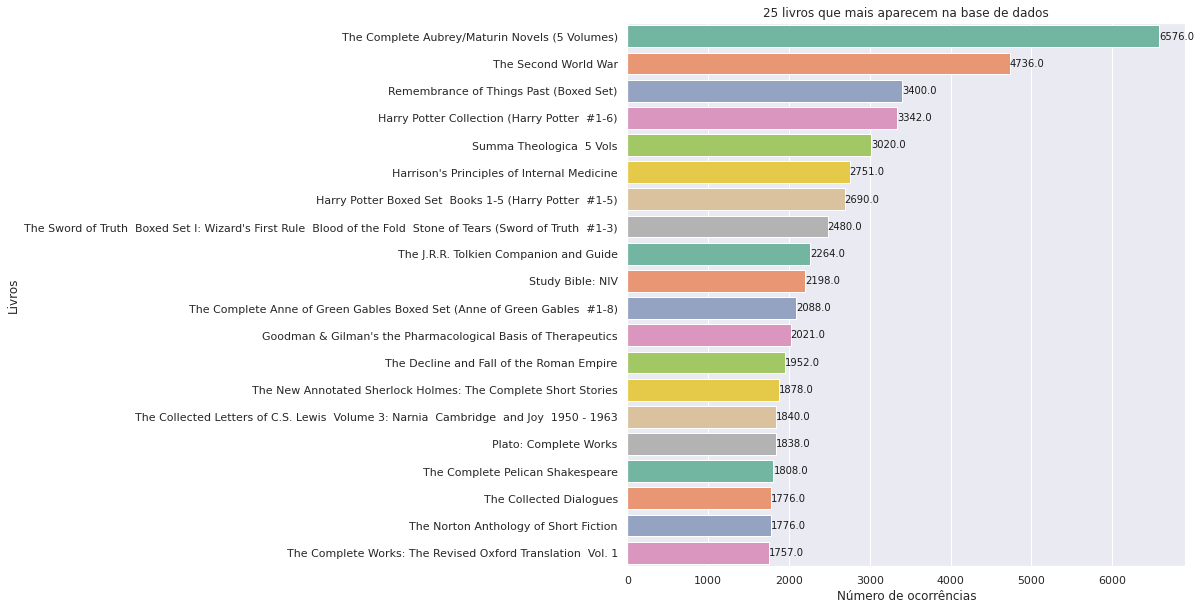

In [16]:
#plotagem do resultado analisado na célula anterior

sns.set(style = "darkgrid")
plt.figure(figsize = (10, 10))
color = sns.color_palette("Set2")
ax = sns.barplot(x = "  num_pages", y = "title", data = top_pages, palette = color)
plt.title("25 livros que mais aparecem na base de dados")
plt.xlabel("Número de ocorrências")
plt.ylabel("Livros")

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 10, color = 'k')
plt.show()

/home/alice/anaconda3/envs/name_of_my_env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/alice/anaconda3/envs/name_of_my_env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/alice/anaconda3/envs/name_of_my_env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/alice/anaconda3/envs/name_of_my_env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/alice/anaconda3/envs/name_of_my_env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37057 missing from current font.
  font.set_text(s, 0.0, fla

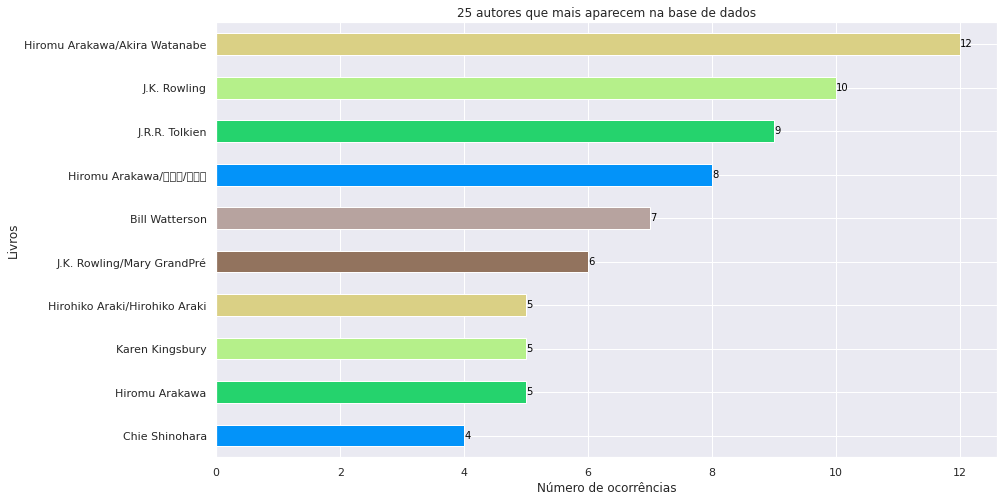

In [17]:
highly_rated_author = my_dataset[my_dataset['average_rating'] > 4.4]
highly_rated_author = highly_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.subplots(figsize = (14, 8))
ax = highly_rated_author['title'].sort_values().plot.barh(width = 0.5, color = sns.color_palette('terrain', 6))

#plotagem do resultado analisado
plt.title("25 autores que mais aparecem na base de dados")
plt.xlabel("Número de ocorrências")
plt.ylabel("Livros")

totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y() + 0.2, str(round(i.get_width())), fontsize = 10, color='black')
plt.show()

**Referências**

<a href = 'https://www.kaggle.com/jealousleopard/goodreadsbooks'> Dataset Analisado </a>
<br><a href = 'https://pythonhow.com/data-analysis-with-python-pandas/'> Leitura csv </a>
<br><a href = 'https://www.kaggle.com/listonlt/books-data-visualisation-with-seaborn'> Visualization With Seaborn</a>
<br><a href = 'https://www.kaggle.com/snanilim/book-recommendation-engine'> Exemplo de utilização do dataset definido </a>
<br><a href = 'https://www.kaggle.com/jolasa/book-recommendation-analysis'> Exemplo de utilização do dataset definido </a>
<br><a href = 'https://www.kaggle.com/hoshi7/goodreads-analysis-and-recommending-books'> Exemplo de utilização do dataset definido </a>
<br><a href = 'https://paulovasconcellos.com.br/como-criar-seu-primeiro-projeto-de-data-science-parte-1-de-2-d846c4c8d314'> Como Criar Seu Primeiro Projeto de Data Science Parte 1/2 </a>
<br><a href = 'https://paulovasconcellos.com.br/como-criar-seu-primeiro-projeto-de-data-science-parte-2-de-2-cb9a2fe05eff'> Como Criar Seu Primeiro Projeto de Data Science Parte 2/2 </a>


- Analisando possíveis opções de agrupamento
<br><a href = 'https://www.kaggle.com/data13/predict-book-rating-with-linear-regression'> Predizendo avaliações de livros com Regressão Linear </a>
<br><a href = 'https://medium.com/@cassio.giehl/agrupamento-com-machine-learning-usando-python-79e55ec71c6d'> Agrupamento com Machine Learning Usando Python </a>
<br><a href = 'https://www.alura.com.br/artigos/agrupando-dados-com-python'> Agrupando dados com python </a>